# First model D+3

Here is a research notebook used for tests on the mathematical study of our multivariate time serie.

![](https://machinelearningplus.sirv.com/WP_www.machinelearningplus.com/2019/07/E/q/n/Equation_VAR2_Model_with_three_Ys-min.png)

Here you can find a video explanation of Multivariates time series:
https://www.youtube.com/watch?v=T9VrEhdXYRs

Our data is almost stationnary, so we can use the VAR model.

NB: 
>In mathematics and statistics, a stationary process (or a strict/strictly stationary process or strong/strongly stationary >process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. >Consequently, parameters such as mean and variance also do not change over time.

https://en.wikipedia.org/wiki/Stationary_process



![](Pictures/stationary.png)

### Import librairies:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot,autocorrelation_plot
import time
import datetime

# Statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Parameters:

In [2]:
#dataset
CSV_PATH = "Datasets/"
CSV_NAME = "trainingDatasetDplus3.csv"
features_considered = ['temperature','humidite','IQ','IQ_J+1','IQ_J+2','IQ_J+3']
nb_features_for_prediction = 3 #chose the number of those features that are used for the training

### Import dataset:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                  temperature  humidite   IQ  IQ_J+1  IQ_J+2  IQ_J+3
Date                                                                
29/11/2019 12:00     0.351351      0.73  0.3       4       6       5
29/11/2019 09:00     0.314189      0.90  0.3       4       6       5
29/11/2019 06:00     0.320946      0.95  0.3       4       6       5
29/11/2019 03:00     0.334459      0.91  0.3       4       6       5
29/11/2019 00:00     0.347973      0.97  0.3       4       6       5


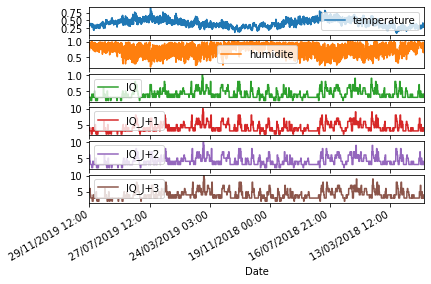

In [3]:
df = pd.read_csv(CSV_PATH+CSV_NAME, header=0, delimiter=';')

features = df[features_considered]
features.index = df['Date']

#normalize
features['temperature'] = features['temperature'].apply(lambda x: (x - (-12.30))/((46.90)-(-12.30))) # to change
features['humidite'] = features['humidite'].apply(lambda x: x/100)
features['IQ'] = features['IQ'].apply(lambda x: x/10)

print(features.head())
features.plot(subplots=True)
plt.show()

dataset = features.values

Let's test some basics studies, begining with the autocorrealation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


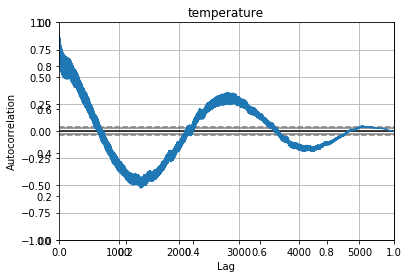

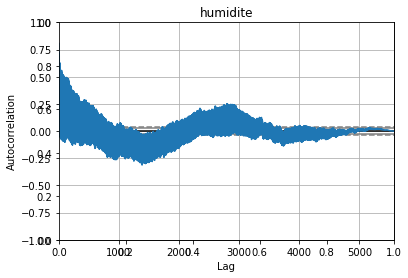

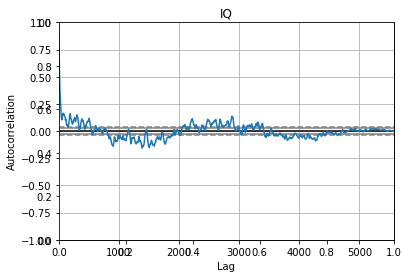

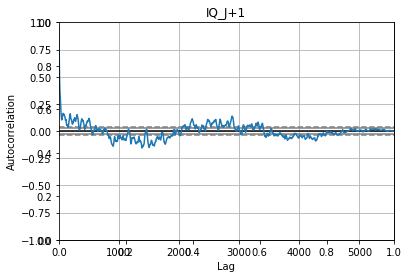

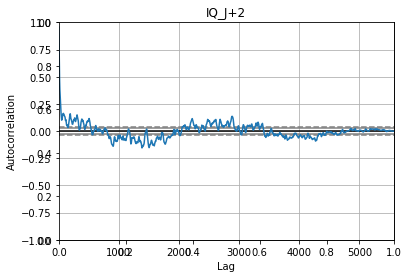

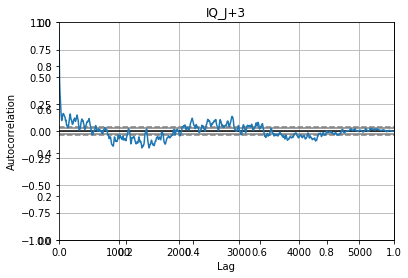

In [4]:
for f in features_considered:
    plt.title(f)
    autocorrelation_plot(features[f])
    plt.show()

And the correlation:

In [5]:
features.corr()

,temperature,humidite,IQ,IQ_J+1,IQ_J+2,IQ_J+3
temperature,1.000000,-0.617532,0.131013,0.100828,0.067707,0.038520
humidite,-0.617532,1.000000,-0.219973,-0.231375,-0.208107,-0.177056
IQ,0.131013,-0.219973,1.000000,0.654364,0.407923,0.312843
IQ_J+1,0.100828,-0.231375,0.654364,1.000000,0.653605,0.406684
IQ_J+2,0.067707,-0.208107,0.407923,0.653605,1.000000,0.653722
IQ_J+3,0.038520,-0.177056,0.312843,0.406684,0.653722,1.000000


At least we see taht there's effectively a strong correlation between the IQ of the differents days.

### Create training data

In [6]:
train,validation = dataset[0:int(len(dataset)*0.8)],dataset[int(len(dataset)*0.8):]
x_train, y_train = train[:,0:nb_features_for_prediction],train[:,nb_features_for_prediction:]
x_val, y_val = validation[:,0:nb_features_for_prediction],validation[:,nb_features_for_prediction:]

print("train ",train.shape)
print("validation ",validation.shape,"\n")
print("x_train ",x_train.shape)
print("y_train ",y_train.shape)
print("x_val ",x_val.shape)
print("y_val ",y_val.shape)

train  (4454, 6)
validation  (1114, 6) 

x_train  (4454, 3)
y_train  (4454, 3)
x_val  (1114, 3)
y_val  (1114, 3)


### Create the regression model:

In [ ]:
#fit model
model = VAR(endog = train)
model_fit = model.fit()

### See the results

In [7]:
def calc_accuracy_3days(y_pred,y_true):
    """
    calculate the accurracy of the prediction according to the true value for each day [D+1, D+2, D+3]
    """
    accuracy = [0,0,0]
    for pred,true in zip (y_pred,y_true):
        for plusDay in range(3):
            if true[plusDay] == round(pred[plusDay]):
                accuracy[plusDay]+=1
    return(np.array(accuracy)/len(y_true)*100)
    
def mean_error_3days(y_pred,y_true):
    """
    calculate the mean error between the prediction and the true value for each day [D+1, D+2, D+3]
    """
    error = [0,0,0]
    for pred,true in zip (y_pred,y_true):
        for plusDay in range(3):
            error[plusDay] += abs(true[plusDay] - pred[plusDay])
    return(np.array(error)/len(y_true))

Calculate the accuracy and mean error for each day [D+1, D+2, D+3]:

In [8]:
y_pred = model.predict(x_train)
accuracy = calc_accuracy_3days(y_pred,y_train)
meanError = mean_error_3days(y_pred,y_train)

NameError: name 'model' is not defined

Show the results in graphs:

In [ ]:
print('Prediction of the air index quality (on training data)')
for plusDay in range(3):
    #plot predict    
    plt.plot(y_train[:,plusDay], label='Real')
    plt.plot(y_pred[:,plusDay], label='Prediction')
    plt.xlabel('Days', fontsize=18)
    plt.ylabel('D+'+str(plusDay+1), fontsize=16)
    plt.legend()
    plt.show()

    print("Accuracy with training data:",round(accuracy[plusDay],2),"%")
    print("Mean error with training data:",round(meanError[plusDay],2))
